In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
path_to_data = "../data/output.csv"
full_dataset = pd.read_csv(path_to_data)
full_data_df = full_dataset.replace(to_replace=0.6000000000000001, value=.6)
full_data_df

,num_individuals,num_neighbors,num_facts,starting_knowledge,investigation_probability,philosophy,truth_mean,truth_total,false_mean,false_total
0,8,8,16,15,0.0,skeptical,0.691540,53,0.308460,25
1,8,8,16,15,0.0,skeptical,0.452304,34,0.547696,44
2,8,8,16,15,0.0,skeptical,0.676573,53,0.323427,29
3,8,8,16,15,0.0,skeptical,0.497285,36,0.502715,37
4,8,8,16,15,0.0,skeptical,0.489836,40,0.510164,43
...,...,...,...,...,...,...,...,...,...,...
7195,20,8,300,15,0.6,reid,0.427249,1615,0.572751,2165
7196,20,8,900,15,0.0,reid,0.716798,3627,0.283202,1433
7197,60,8,16,15,0.0,skeptical,0.519184,307,0.480816,278
7198,60,8,16,15,0.0,skeptical,0.633720,386,0.366280,227


## First lets take just the data the original paper did (with constraint that I only have 8 neighbors)

In [10]:
dataset_100_individuals = full_data_df[full_data_df['num_individuals'] == 100]
dataset_100_individuals_1500_facts = dataset_100_individuals[dataset_100_individuals['num_facts'] == 1500]
dataset_100_individuals_1500_facts_6_invprob = dataset_100_individuals_1500_facts[dataset_100_individuals_1500_facts['investigation_probability']==.6]
original_paper_param_data = dataset_100_individuals_1500_facts_6_invprob
original_paper_param_data

,num_individuals,num_neighbors,num_facts,starting_knowledge,investigation_probability,philosophy,truth_mean,truth_total,false_mean,false_total
7115,100,8,1500,15,0.6,skeptical,0.580810,866,0.419190,626
7116,100,8,1500,15,0.6,skeptical,0.558000,833,0.442000,661
7117,100,8,1500,15,0.6,skeptical,0.608652,910,0.391348,585
7118,100,8,1500,15,0.6,skeptical,0.560857,838,0.439143,654
7119,100,8,1500,15,0.6,skeptical,0.557905,833,0.442095,660
7120,100,8,1500,15,0.6,skeptical,0.592762,886,0.407238,609
7121,100,8,1500,15,0.6,skeptical,0.590476,882,0.409524,613
7122,100,8,1500,15,0.6,skeptical,0.588429,880,0.411571,614
7123,100,8,1500,15,0.6,skeptical,0.645429,966,0.354571,530
7124,100,8,1500,15,0.6,skeptical,0.595689,887,0.404311,602


In [15]:
orig_paper_params_avgs = original_paper_param_data.groupby(['philosophy']).mean()
orig_paper_params_avgs

,num_individuals,num_neighbors,num_facts,starting_knowledge,investigation_probability,truth_mean,truth_total,false_mean,false_total
philosophy,,,,,,,,,
direct,100.0,8.0,1500.0,15.0,0.6,0.950930,19022.5,0.049070,1062.2
indirect,100.0,8.0,1500.0,15.0,0.6,0.616722,53376.9,0.383278,33166.0
reid,100.0,8.0,1500.0,15.0,0.6,0.600572,54754.5,0.399428,36413.4
skeptical,100.0,8.0,1500.0,15.0,0.6,0.587901,878.1,0.412099,615.4


In [20]:
list(orig_paper_params_avgs.index.unique())

['direct', 'indirect', 'reid', 'skeptical']

In [36]:
x = list(orig_paper_params_avgs.index.unique())
y_truth_mean = list(orig_paper_params_avgs['truth_mean'])
y_truth_mean

[0.9509301339769168,
 0.6167222621917422,
 0.6005717365063413,
 0.5879007326007326]

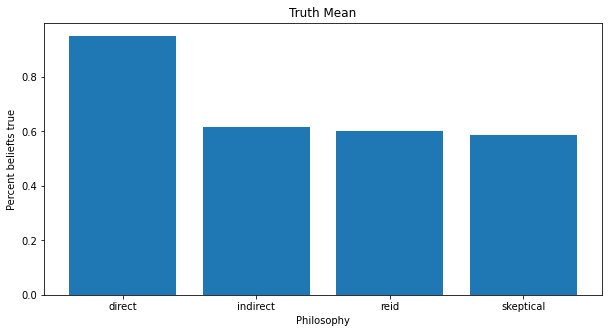

In [42]:
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(x, y_truth_mean)
plt.xlabel("Philosophy")
plt.ylabel("Percent beliefts true")
plt.title("Truth Mean")
plt.show()

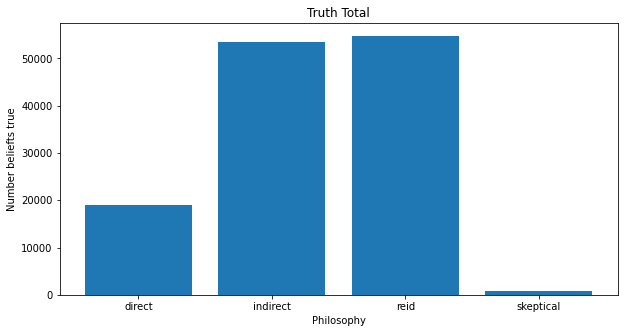

In [43]:
x = list(orig_paper_params_avgs.index.unique())
y_truth_total = list(orig_paper_params_avgs['truth_total'])
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(x, y_truth_total)
plt.xlabel("Philosophy")
plt.ylabel("Number beliefts true")
plt.title("Truth Total")
plt.show()

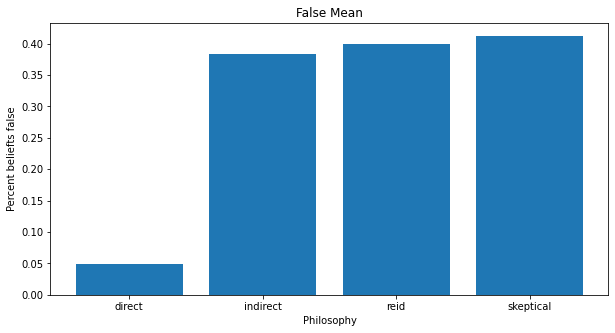

In [44]:
x = list(orig_paper_params_avgs.index.unique())
y_false_mean = list(orig_paper_params_avgs['false_mean'])
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(x, y_false_mean)
plt.xlabel("Philosophy")
plt.ylabel("Percent beliefts false")
plt.title("False Mean")
plt.show()

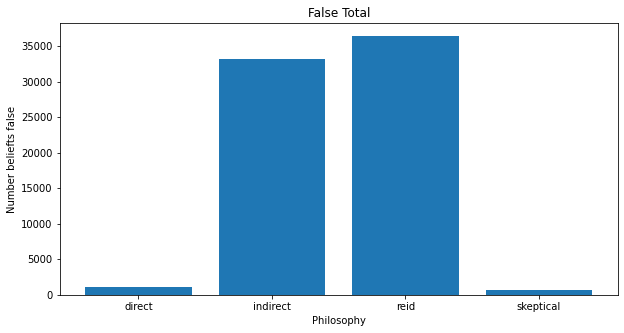

In [45]:
x = list(orig_paper_params_avgs.index.unique())
y_false_total = list(orig_paper_params_avgs['false_total'])
fig = plt.figure(figsize = (10, 5))
# creating the bar plot
plt.bar(x, y_false_total)
plt.xlabel("Philosophy")
plt.ylabel("Number beliefts false")
plt.title("False Total")
plt.show()

In [56]:
original_paper_param_data

,num_individuals,num_neighbors,num_facts,starting_knowledge,investigation_probability,philosophy,truth_mean,truth_total,false_mean,false_total
7115,100,8,1500,15,0.6,skeptical,0.580810,866,0.419190,626
7116,100,8,1500,15,0.6,skeptical,0.558000,833,0.442000,661
7117,100,8,1500,15,0.6,skeptical,0.608652,910,0.391348,585
7118,100,8,1500,15,0.6,skeptical,0.560857,838,0.439143,654
7119,100,8,1500,15,0.6,skeptical,0.557905,833,0.442095,660
7120,100,8,1500,15,0.6,skeptical,0.592762,886,0.407238,609
7121,100,8,1500,15,0.6,skeptical,0.590476,882,0.409524,613
7122,100,8,1500,15,0.6,skeptical,0.588429,880,0.411571,614
7123,100,8,1500,15,0.6,skeptical,0.645429,966,0.354571,530
7124,100,8,1500,15,0.6,skeptical,0.595689,887,0.404311,602


In [58]:
original_paper_param_data_that_changes = original_paper_param_data[['philosophy','truth_mean', 'truth_total', 'false_mean', 'false_total']].copy()

In [59]:
original_paper_param_data_that_changes

,philosophy,truth_mean,truth_total,false_mean,false_total
7115,skeptical,0.580810,866,0.419190,626
7116,skeptical,0.558000,833,0.442000,661
7117,skeptical,0.608652,910,0.391348,585
7118,skeptical,0.560857,838,0.439143,654
7119,skeptical,0.557905,833,0.442095,660
7120,skeptical,0.592762,886,0.407238,609
7121,skeptical,0.590476,882,0.409524,613
7122,skeptical,0.588429,880,0.411571,614
7123,skeptical,0.645429,966,0.354571,530
7124,skeptical,0.595689,887,0.404311,602


In [61]:
orig_paper_params_skeptical_data = original_paper_param_data_that_changes[original_paper_param_data_that_changes['philosophy']=='skeptical']
orig_paper_params_reid_data = original_paper_param_data_that_changes[original_paper_param_data_that_changes['philosophy']=='reid']
orig_paper_params_direct_data = original_paper_param_data_that_changes[original_paper_param_data_that_changes['philosophy']=='direct']
orig_paper_params_indirect_data = original_paper_param_data_that_changes[original_paper_param_data_that_changes['philosophy']=='indirect']

In [62]:
orig_paper_params_skeptical_data

,philosophy,truth_mean,truth_total,false_mean,false_total
7115,skeptical,0.580810,866,0.419190,626
7116,skeptical,0.558000,833,0.442000,661
7117,skeptical,0.608652,910,0.391348,585
7118,skeptical,0.560857,838,0.439143,654
7119,skeptical,0.557905,833,0.442095,660
7120,skeptical,0.592762,886,0.407238,609
7121,skeptical,0.590476,882,0.409524,613
7122,skeptical,0.588429,880,0.411571,614
7123,skeptical,0.645429,966,0.354571,530
7124,skeptical,0.595689,887,0.404311,602


### Coorelation matricies on og data

In [63]:
orig_paper_params_skeptical_data.corr()

,truth_mean,truth_total,false_mean,false_total
truth_mean,1.000000,0.999544,-1.000000,-0.999629
truth_total,0.999544,1.000000,-0.999544,-0.998889
false_mean,-1.000000,-0.999544,1.000000,0.999629
false_total,-0.999629,-0.998889,0.999629,1.000000


In [64]:
orig_paper_params_reid_data.corr()

,truth_mean,truth_total,false_mean,false_total
truth_mean,1.000000,0.975264,-1.000000,-0.987071
truth_total,0.975264,1.000000,-0.975264,-0.927342
false_mean,-1.000000,-0.975264,1.000000,0.987071
false_total,-0.987071,-0.927342,0.987071,1.000000


In [65]:
orig_paper_params_direct_data.corr()

,truth_mean,truth_total,false_mean,false_total
truth_mean,1.000000,-0.620805,-1.000000,-0.896166
truth_total,-0.620805,1.000000,0.620805,0.896546
false_mean,-1.000000,0.620805,1.000000,0.896166
false_total,-0.896166,0.896546,0.896166,1.000000


In [66]:
orig_paper_params_indirect_data.corr()

,truth_mean,truth_total,false_mean,false_total
truth_mean,1.000000,0.981706,-1.000000,-0.992113
truth_total,0.981706,1.000000,-0.981706,-0.950227
false_mean,-1.000000,-0.981706,1.000000,0.992113
false_total,-0.992113,-0.950227,0.992113,1.000000


### The direct has an unusual relationship between truth mean and truth total, false mean and truth total, and false total and truth total

In [67]:
full_data_df

,num_individuals,num_neighbors,num_facts,starting_knowledge,investigation_probability,philosophy,truth_mean,truth_total,false_mean,false_total
0,8,8,16,15,0.0,skeptical,0.691540,53,0.308460,25
1,8,8,16,15,0.0,skeptical,0.452304,34,0.547696,44
2,8,8,16,15,0.0,skeptical,0.676573,53,0.323427,29
3,8,8,16,15,0.0,skeptical,0.497285,36,0.502715,37
4,8,8,16,15,0.0,skeptical,0.489836,40,0.510164,43
...,...,...,...,...,...,...,...,...,...,...
7195,20,8,300,15,0.6,reid,0.427249,1615,0.572751,2165
7196,20,8,900,15,0.0,reid,0.716798,3627,0.283202,1433
7197,60,8,16,15,0.0,skeptical,0.519184,307,0.480816,278
7198,60,8,16,15,0.0,skeptical,0.633720,386,0.366280,227


In [68]:
full_data_df_that_changes = full_data_df[['num_individuals', 'num_facts', 'investigation_probability','philosophy','truth_mean', 'truth_total', 'false_mean', 'false_total']].copy()
full_data_df_that_changes

,num_individuals,num_facts,investigation_probability,philosophy,truth_mean,truth_total,false_mean,false_total
0,8,16,0.0,skeptical,0.691540,53,0.308460,25
1,8,16,0.0,skeptical,0.452304,34,0.547696,44
2,8,16,0.0,skeptical,0.676573,53,0.323427,29
3,8,16,0.0,skeptical,0.497285,36,0.502715,37
4,8,16,0.0,skeptical,0.489836,40,0.510164,43
...,...,...,...,...,...,...,...,...
7195,20,300,0.6,reid,0.427249,1615,0.572751,2165
7196,20,900,0.0,reid,0.716798,3627,0.283202,1433
7197,60,16,0.0,skeptical,0.519184,307,0.480816,278
7198,60,16,0.0,skeptical,0.633720,386,0.366280,227


In [69]:
full_data_df_that_changes_skeptical_data = full_data_df_that_changes[full_data_df_that_changes['philosophy']=='skeptical']
full_data_df_that_changes_reid_data = full_data_df_that_changes[full_data_df_that_changes['philosophy']=='reid']
full_data_df_that_changes_direct_data = full_data_df_that_changes[full_data_df_that_changes['philosophy']=='direct']
full_data_df_that_changes_indirect_data = full_data_df_that_changes[full_data_df_that_changes['philosophy']=='indirect']

In [75]:
full_data_df_that_changes_skeptical_data

,num_individuals,num_facts,investigation_probability,philosophy,truth_mean,truth_total,false_mean,false_total
0,8,16,0.0,skeptical,0.691540,53,0.308460,25
1,8,16,0.0,skeptical,0.452304,34,0.547696,44
2,8,16,0.0,skeptical,0.676573,53,0.323427,29
3,8,16,0.0,skeptical,0.497285,36,0.502715,37
4,8,16,0.0,skeptical,0.489836,40,0.510164,43
...,...,...,...,...,...,...,...,...
7163,100,1500,0.8,skeptical,0.582667,868,0.417333,623
7164,100,1500,0.8,skeptical,0.579619,863,0.420381,627
7197,60,16,0.0,skeptical,0.519184,307,0.480816,278
7198,60,16,0.0,skeptical,0.633720,386,0.366280,227


### Coorelation matricies on full data

In [71]:
full_data_df_that_changes_skeptical_data.corr()

,num_individuals,num_facts,investigation_probability,truth_mean,truth_total,false_mean,false_total
num_individuals,1.000000e+00,2.265506e-17,-9.499952e-17,-0.003546,0.966299,0.003546,0.958770
num_facts,2.265506e-17,1.000000e+00,2.184870e-17,0.013694,0.138363,-0.013694,0.133842
investigation_probability,-9.499952e-17,2.184870e-17,1.000000e+00,0.000646,-0.001280,-0.000646,0.001523
truth_mean,-3.545849e-03,1.369374e-02,6.461415e-04,1.000000,0.065311,-1.000000,-0.113063
truth_total,9.662989e-01,1.383630e-01,-1.280138e-03,0.065311,1.000000,-0.065311,0.967210
false_mean,3.545849e-03,-1.369374e-02,-6.461415e-04,-1.000000,-0.065311,1.000000,0.113063
false_total,9.587704e-01,1.338425e-01,1.522809e-03,-0.113063,0.967210,0.113063,1.000000


In [72]:
full_data_df_that_changes_reid_data.corr()

,num_individuals,num_facts,investigation_probability,truth_mean,truth_total,false_mean,false_total
num_individuals,1.000000e+00,-3.118456e-16,1.504754e-15,0.026960,0.750817,-0.026960,0.749739
num_facts,-3.118456e-16,1.000000e+00,2.140130e-16,0.004500,0.466602,-0.004500,0.459965
investigation_probability,1.504754e-15,2.140130e-16,1.000000e+00,0.011378,-0.000412,-0.011378,-0.001521
truth_mean,2.695987e-02,4.500128e-03,1.137843e-02,1.000000,0.044757,-1.000000,-0.036863
truth_total,7.508167e-01,4.666019e-01,-4.115281e-04,0.044757,1.000000,-0.044757,0.984791
false_mean,-2.695987e-02,-4.500128e-03,-1.137843e-02,-1.000000,-0.044757,1.000000,0.036863
false_total,7.497389e-01,4.599649e-01,-1.520526e-03,-0.036863,0.984791,0.036863,1.000000


In [73]:
full_data_df_that_changes_direct_data.corr()

,num_individuals,num_facts,investigation_probability,truth_mean,truth_total,false_mean,false_total
num_individuals,1.000000e+00,-4.838825e-16,1.429208e-15,0.682819,0.748821,-0.682819,0.364342
num_facts,-4.838825e-16,1.000000e+00,1.209913e-16,0.243942,0.359294,-0.243942,0.326063
investigation_probability,1.429208e-15,1.209913e-16,1.000000e+00,0.004827,0.000662,-0.004827,-0.011792
truth_mean,6.828188e-01,2.439423e-01,4.826902e-03,1.000000,0.684971,-1.000000,0.290609
truth_total,7.488214e-01,3.592937e-01,6.619929e-04,0.684971,1.000000,-0.684971,0.713302
false_mean,-6.828188e-01,-2.439423e-01,-4.826902e-03,-1.000000,-0.684971,1.000000,-0.290609
false_total,3.643422e-01,3.260631e-01,-1.179235e-02,0.290609,0.713302,-0.290609,1.000000


In [74]:
full_data_df_that_changes_indirect_data.corr()

,num_individuals,num_facts,investigation_probability,truth_mean,truth_total,false_mean,false_total
num_individuals,1.000000e+00,-4.838825e-16,1.429208e-15,0.073471,0.758493,-0.073471,0.746589
num_facts,-4.838825e-16,1.000000e+00,1.209913e-16,-0.075774,0.456156,0.075774,0.465207
investigation_probability,1.429208e-15,1.209913e-16,1.000000e+00,-0.047620,0.000129,0.047620,0.002831
truth_mean,7.347139e-02,-7.577353e-02,-4.761973e-02,1.000000,0.045998,-1.000000,-0.054593
truth_total,7.584927e-01,4.561558e-01,1.292564e-04,0.045998,1.000000,-0.045998,0.979465
false_mean,-7.347139e-02,7.577353e-02,4.761973e-02,-1.000000,-0.045998,1.000000,0.054593
false_total,7.465892e-01,4.652072e-01,2.830577e-03,-0.054593,0.979465,0.054593,1.000000
